## Load Fucntion file

In [1]:
%run -i XAI.py


**HIstoric data**

# Give the path to save the results and load files

In [2]:
Results = create_folder_to_save('/Extratre_tuned')

In [3]:
save_Model = make_path_to_save(Results,'Extratree')
save_features = make_path_to_save(save_Model,'Features_importance')
saveRCP_45 = make_path_to_save(save_Model,'RCP45')
saveRCP_85 = make_path_to_save(save_Model,'RCP85')

In [4]:
df_historical_climate = Load_df_AI('df_AI.csv')
df_historical_climate.describe()

,$T_{min}$ [$^oC$],$T_{max}$ [$^oC$],$P$ [mm]
count,3149.000000,3149.000000,3149.000000
mean,13.568321,26.482422,17.388114
std,7.639396,7.430151,30.479733
min,-8.800000,0.557143,0.000000
25%,7.057143,20.942857,0.000000
50%,14.159677,27.214286,5.100000
75%,20.900000,32.700000,23.100000
max,25.957143,40.414286,473.400000


In [5]:
current_directory = os.getcwd()
skip_rows = 30
base_dir  = current_directory
filename  = r"Daily_SpringDischarge_SanMarcos.csv"
Approved_date = '2020-11-29'

#- SF-data is springflow data used in the validation through ET & SM-#

df_AI, Sf_data = Load_Springs(df_historical_climate,Approved_date,
                              skip_rows,base_dir,filename)

df_AI.describe()

,$T_{min}$ [$^oC$],$T_{max}$ [$^oC$],$P$ [mm],SF$[m^3/s]$
count,3144.000000,3144.000000,3144.000000,3144.000000
mean,13.585542,26.493476,17.396238,4.996305
std,7.632612,7.429954,30.496073,1.871899
min,-8.800000,0.557143,0.000000,1.990286
25%,7.071429,20.942857,0.000000,3.550786
50%,14.200000,27.228571,5.100000,4.639786
75%,20.928571,32.714286,23.150000,6.040536
max,25.957143,40.414286,473.400000,12.759000


## Load the MACA 45

In [6]:
#----------------------------------------
# RCP 4.5 - M4-Tmax; M10-Precip; M17-Tmin
#----------------------------------------

temp = MACA_data_SM(45,'M_18_Japan')

df_MACA_RCP45 = pd.DataFrame()
df_MACA_RCP45[['Date','$T_{max}$ [$^oC$]']] = temp[['Date','Tmax[C]']]
df_MACA_RCP45.index = pd.DatetimeIndex(df_MACA_RCP45['Date'])
df_MACA_RCP45.drop(['Date'],axis=1,inplace=True)


temp =MACA_data_SM(45,'M_18_Japan')
df_MACA_RCP45['$P$ [mm]'] = temp['Precip[mm]'].values


temp = MACA_data_SM(45,'M_4_USA')
df_MACA_RCP45['$T_{min}$ [$^oC$]'] = temp['Tmin[C]'].values


df_RCP45_MACA = pd.DataFrame()
df_RCP45_MACA['$T_{min}$ [$^oC$]'] = df_MACA_RCP45['$T_{min}$ [$^oC$]'].resample('W').mean()
df_RCP45_MACA['$T_{max}$ [$^oC$]'] = df_MACA_RCP45['$T_{max}$ [$^oC$]'].resample('W').mean().values
df_RCP45_MACA['$P$ [mm]'] = df_MACA_RCP45['$P$ [mm]'].resample('W').sum().values
df_RCP45_MACA.describe()

,$T_{min}$ [$^oC$],$T_{max}$ [$^oC$],$P$ [mm]
count,4906.000000,4906.000000,4906.000000
mean,15.311680,27.562172,18.328250
std,7.595859,7.689294,30.304124
min,-13.247194,1.649962,0.000000
25%,8.967193,21.722520,1.097293
50%,16.249530,28.119324,6.868001
75%,22.411885,33.920475,22.892587
max,27.602197,46.927602,400.595908


## Load the RCP 8.5

In [7]:

#----------------------------------------
# RCP 8.5- M4-Tmax; M10-Precip; M17-Tmin
#----------------------------------------

temp = MACA_data_SM(85,'M_18_Japan')

df_MACA_RCP85 = pd.DataFrame()
df_MACA_RCP85[['Date','$T_{max}$ [$^oC$]']] = temp[['Date','Tmax[C]']]
df_MACA_RCP85.index = pd.DatetimeIndex(df_MACA_RCP85['Date'])
df_MACA_RCP85.drop(['Date'],axis=1,inplace=True)



df_MACA_RCP85['$P$ [mm]']=MACA_data_SM(85,'M_18_Japan')['Precip[mm]'].values



df_MACA_RCP85['$T_{min}$ [$^oC$]']= MACA_data_SM(85,'M_4_USA')['Tmin[C]'].values


df_RCP85_MACA = pd.DataFrame()
df_RCP85_MACA['$T_{min}$ [$^oC$]'] = df_MACA_RCP85['$T_{min}$ [$^oC$]'].resample('W').mean()
df_RCP85_MACA['$T_{max}$ [$^oC$]'] = df_MACA_RCP85['$T_{max}$ [$^oC$]'].resample('W').mean().values
df_RCP85_MACA['$P$ [mm]'] = df_MACA_RCP85['$P$ [mm]'].resample('W').sum().values
df_RCP85_MACA.describe()

,$T_{min}$ [$^oC$],$T_{max}$ [$^oC$],$P$ [mm]
count,4906.000000,4906.000000,4906.000000
mean,16.317949,28.518329,17.723373
std,7.637849,8.005146,28.827272
min,-5.535311,-2.486796,0.000000
25%,9.987640,22.538566,0.969075
50%,17.270654,29.091135,6.643954
75%,23.415739,34.899279,21.658387
max,29.437982,46.867452,341.637357


# Feature Engineering

In [8]:
# Pumping patterns is hypothesized to be associated with the month
df_AI['Month'] = df_AI.index.month 

# There could be some lag effects in the hydroclimatic behavior for Karst aquifers
df_AI['$T_{max}^{lag1}$ [$^oC$]'] = df_AI['$T_{max}$ [$^oC$]'].shift(1)
df_AI['$T_{max}^{lag2}$ [$^oC$]'] = df_AI['$T_{max}$ [$^oC$]'].shift(2)

df_AI['$T_{min}^{lag1}$ [$^oC$]'] = df_AI['$T_{min}$ [$^oC$]'].shift(1)
df_AI['$T_{min}^{lag2}$ [$^oC$]'] = df_AI['$T_{min}$ [$^oC$]'].shift(2)

df_AI['$P^{lag1}$ [mm]'] = df_AI['$P$ [mm]'].shift(1)
df_AI['$P^{lag2}$ [mm]'] = df_AI['$P$ [mm]'].shift(2)

df_AI['SF$^{lag1} [m^3/s]$'] = df_AI['SF$[m^3/s]$'].shift(1)
df_AI['SF$^{lag2} [m^3/s]$'] = df_AI['SF$[m^3/s]$'].shift(2)

df_AI.dropna(inplace=True)
df_AI

,$T_{min}$ [$^oC$],$T_{max}$ [$^oC$],$P$ [mm],SF$[m^3/s]$,Month,$T_{max}^{lag1}$ [$^oC$],$T_{max}^{lag2}$ [$^oC$],$T_{min}^{lag1}$ [$^oC$],$T_{min}^{lag2}$ [$^oC$],$P^{lag1}$ [mm],$P^{lag2}$ [mm],SF$^{lag1} [m^3/s]$,SF$^{lag2} [m^3/s]$
DATE,,,,,,,,,,,,,
1960-09-18,15.542857,32.457143,0.000000,5.711571,9,31.900000,32.775000,21.057143,20.850000,23.900000,4.3,5.934429,6.145000
1960-09-25,17.928571,33.485714,0.000000,5.541571,9,32.457143,31.900000,15.542857,21.057143,0.000000,23.9,5.711571,5.934429
1960-10-02,14.442857,29.114286,0.000000,5.372143,10,33.485714,32.457143,17.928571,15.542857,0.000000,0.0,5.541571,5.711571
1960-10-09,16.342857,32.200000,2.100000,5.270857,10,29.114286,33.485714,14.442857,17.928571,0.000000,0.0,5.372143,5.541571
1960-10-16,17.785714,31.600000,82.300000,5.210000,10,32.200000,29.114286,16.342857,14.442857,2.100000,0.0,5.270857,5.372143
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-01,5.100397,20.477551,9.700000,4.562857,11,29.914286,30.242857,18.742857,16.028571,0.500000,3.6,4.292143,3.960286
2020-11-08,7.911714,25.953588,0.000000,4.134000,11,20.477551,29.914286,5.100397,18.742857,9.700000,0.5,4.562857,4.292143
2020-11-15,16.247473,27.681412,0.000000,3.604286,11,25.953588,20.477551,7.911714,5.100397,0.000000,9.7,4.134000,4.562857


In [9]:

Features = ['Month','$T_{min}$ [$^oC$]','$T_{max}$ [$^oC$]','$P$ [mm]',
            '$P^{lag1}$ [mm]','$P^{lag2}$ [mm]',
            'SF$^{lag1} [m^3/s]$','SF$^{lag2} [m^3/s]$']

#SpringFlow for Comal = Target
Target = ['SF$[m^3/s]$']

#Create Independent and dependent variable for machine learning
X = df_AI[Features].to_numpy()
Y = df_AI[Target].to_numpy()

#Take the tain set till 2005 and test set from 2006 till 2020
df_AI_Train = df_AI[:'2008-12-31']

df_AI_Test = df_AI['2009-01-01':]



train_X = df_AI_Train[Features].to_numpy()
train_y = df_AI_Train[Target].to_numpy()
test_X = df_AI_Test[Features].iloc[0].to_numpy().reshape(1, -1)


# Essemble tree methods

## ExtraTree

In [11]:
%run -i XAI.py

In [14]:
t0 = time()
np.random.seed(100)
scoring_param = make_scorer(mean_squared_error,greater_is_better=False)

p_grid = dict(n_estimators = [int(i) for i in np.linspace(50,600,num=10)],
  max_depth = [int(i) for i in np.linspace(6,30,num=7)])

Model = GridSearchCV(estimator = ExtraTreesRegressor(), param_grid = p_grid, 
                     scoring = scoring_param, cv = 5, verbose=1, n_jobs=-1)

Model.fit(train_X, train_y.ravel())

t1 = time()
Time_Taken = (t1-t0)/60
print("Time taken to train the model: %0.2f" % Time_Taken,"minutes")
# # summarize the results of the grid search
print("Best Score: %0.3f" % Model.best_score_)
print("Best Estimator: %0.3f" % Model.best_params_.get('n_estimators'))
print("Best Max Depth: %0.3f" % Model.best_params_.get('max_depth'))
#print("Best Learning Rate: %0.3f" % xgb_model.best_params_.get('learning_rate'))
Model_SF = ExtraTreesRegressor(n_estimators = Model.best_params_.get('n_estimators'),
                                    max_depth = Model.best_params_.get('max_depth'))
                                    #learning_rate = xgb_model.best_params_.get('learning_rate')).fit(train_X, train_y)


Fitting 5 folds for each of 70 candidates, totalling 350 fits
Time taken to train the model: 0.88 minutes
Best Score: -0.096
Best Estimator: 294.000
Best Max Depth: 30.000


In [15]:
Model_SF

ExtraTreesRegressor(max_depth=30, n_estimators=294)

In [16]:
Model = Model_SF
Model.fit(train_X, train_y.ravel())

ExtraTreesRegressor(max_depth=30, n_estimators=294)

############ Model Accuracy -Training set ############
MAE: 2.004 m/s^3
NSE: 1.000
RMS: 0.000 m/s^3
R-squared: 1.000
########################################
 
############ Model Accuracy -Test set############
MAE: 0.580 m/s^3
NSE: 0.831
R-squared: 0.831
RMS: 0.795 m/s^3
########################################
 


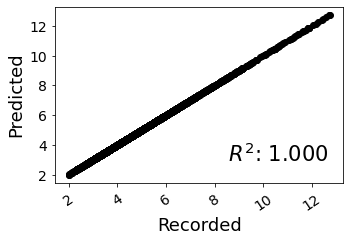

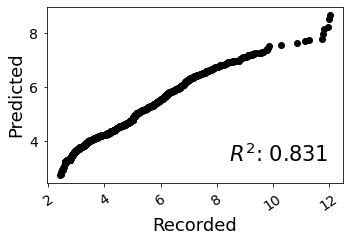

In [17]:
print_results(Model,train_X,train_y,save_Model)

In [18]:
## Test period plot

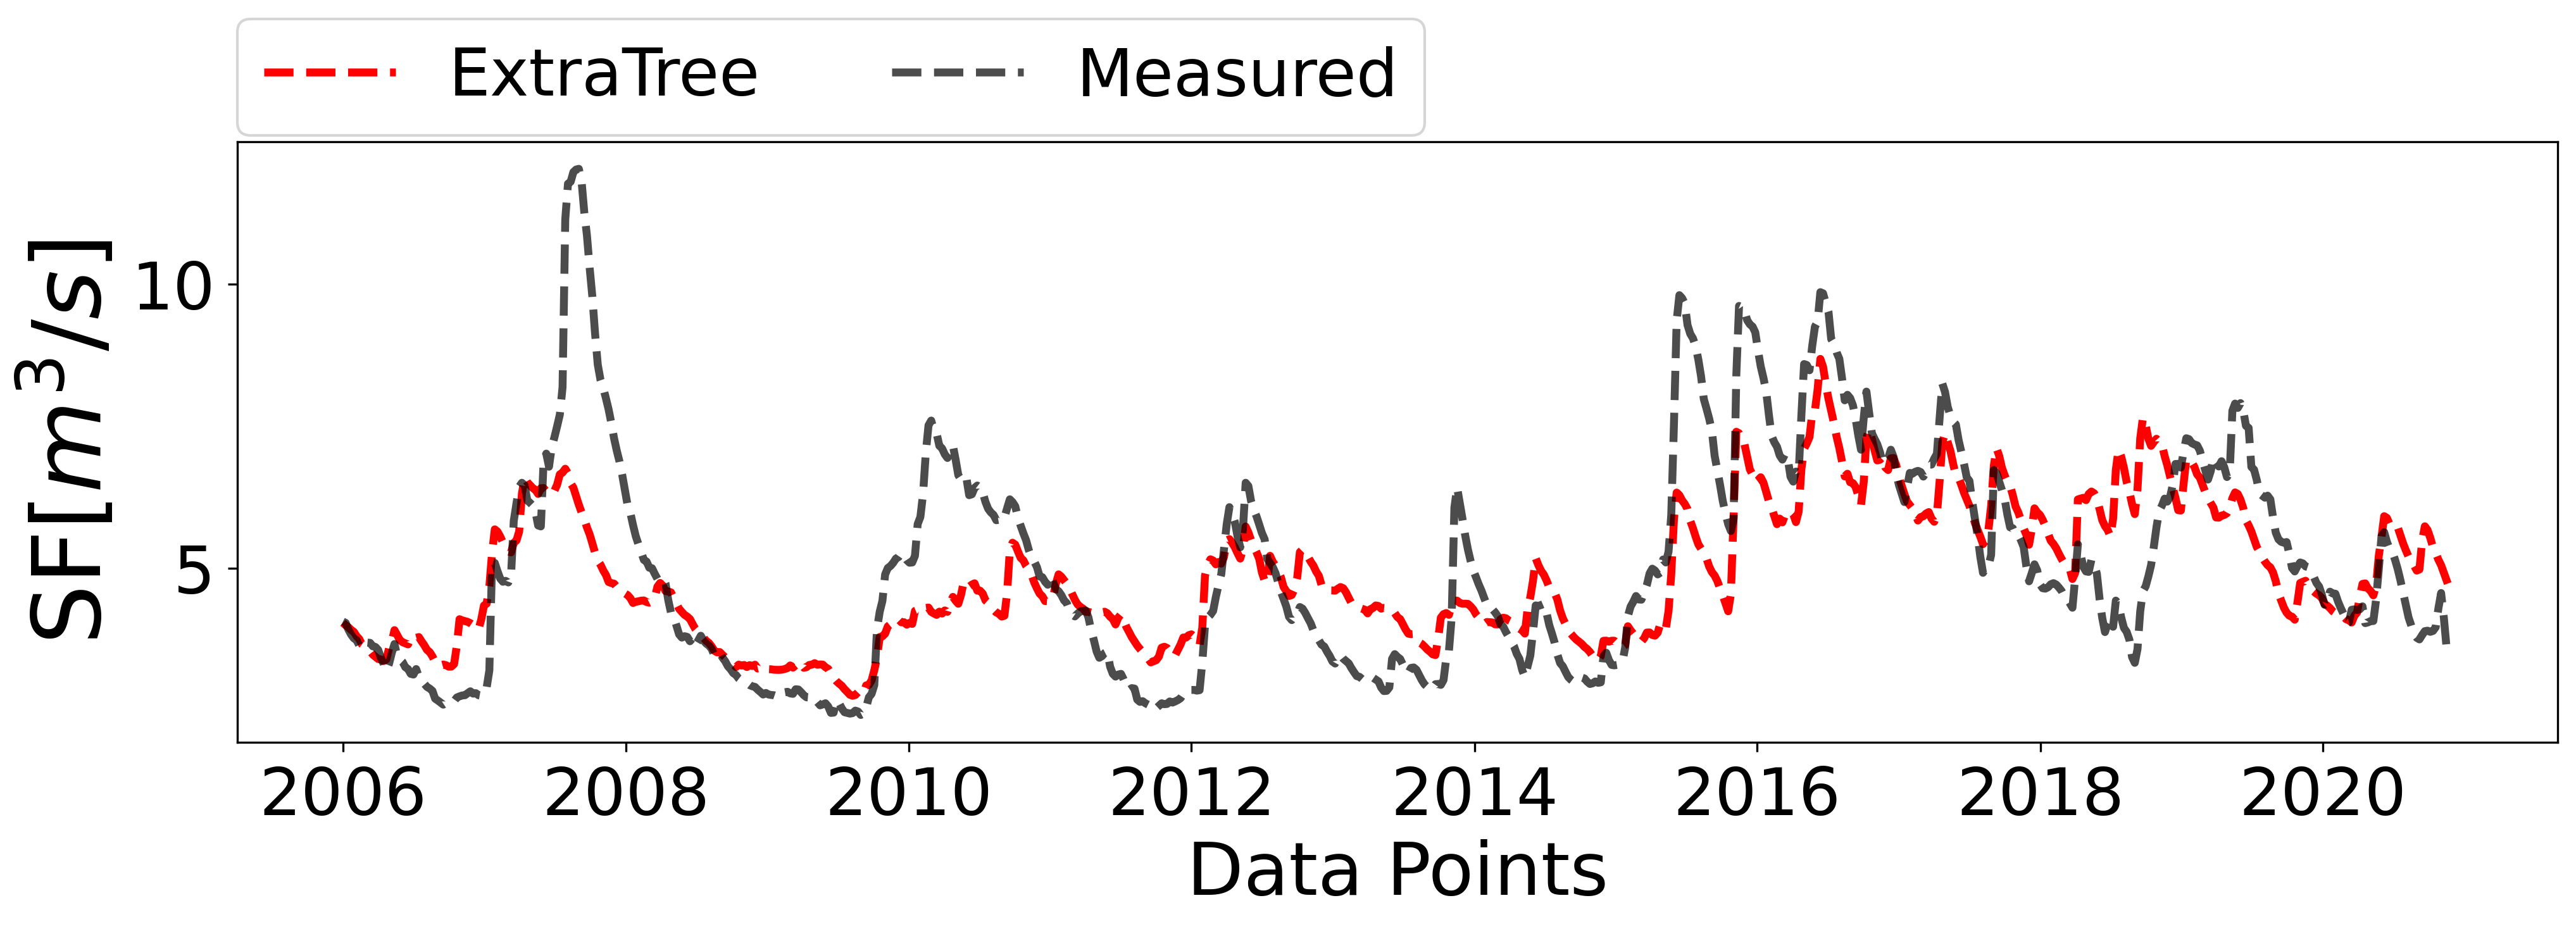

In [19]:
fig = plt.figure(figsize=(14,5),dpi=300)
ax = fig.add_subplot(1,1,1)

ax.plot(df_AI_Test['SF$[m^3/s]$'].index,
        df_AI_Test['SF$^{pred} [m^3/s]$'] , 
        '--', color = 'red', lw = 3, label = 'ExtraTree')
ax.plot(df_AI_Test['SF$[m^3/s]$'].index,
        df_AI_Test['SF$[m^3/s]$'],'--', 
        color = 'black', lw = 3, alpha=0.7, label = 'Measured')

ax.set_xlabel('Data Points', fontsize = 28)
ax.tick_params(axis = "x", labelsize = 25)
ax.xaxis.set_tick_params(pad=5)
ax.set_ylabel('SF$[m^3/s]$', fontsize = 36)

ax.tick_params(axis = "y", labelsize = 25)
ax.yaxis.set_tick_params(pad=5) # gap between ticks and axis
yoffset = 0.05                    #gap between ticks and label
################################################ 
plt.legend(bbox_to_anchor=(0,1.01),
           loc="lower left", ncol=3, 
           borderaxespad=0., prop={'size': 25})

plt.tight_layout(pad=1.08)
fig.savefig(save_Model + str('/Prelim_Data_Analysis__Complete.jpg'), 
            format='jpg', dpi=300, bbox_inches = 'tight')


In [20]:
df_AI.to_excel(save_Model+ str('/df_AI_Spring.xlsx'))


# Shapley Anlysis 

**Shapley Imporatance barplot**

In [21]:
####################################################################
# Update Model SpringFLow Model
####################################################################
#With the whole data from 1946 -2020
Model = Model.fit(X, Y)

explainer = shap.TreeExplainer(Model)
shap_values = explainer.shap_values(df_AI[Features].to_numpy())


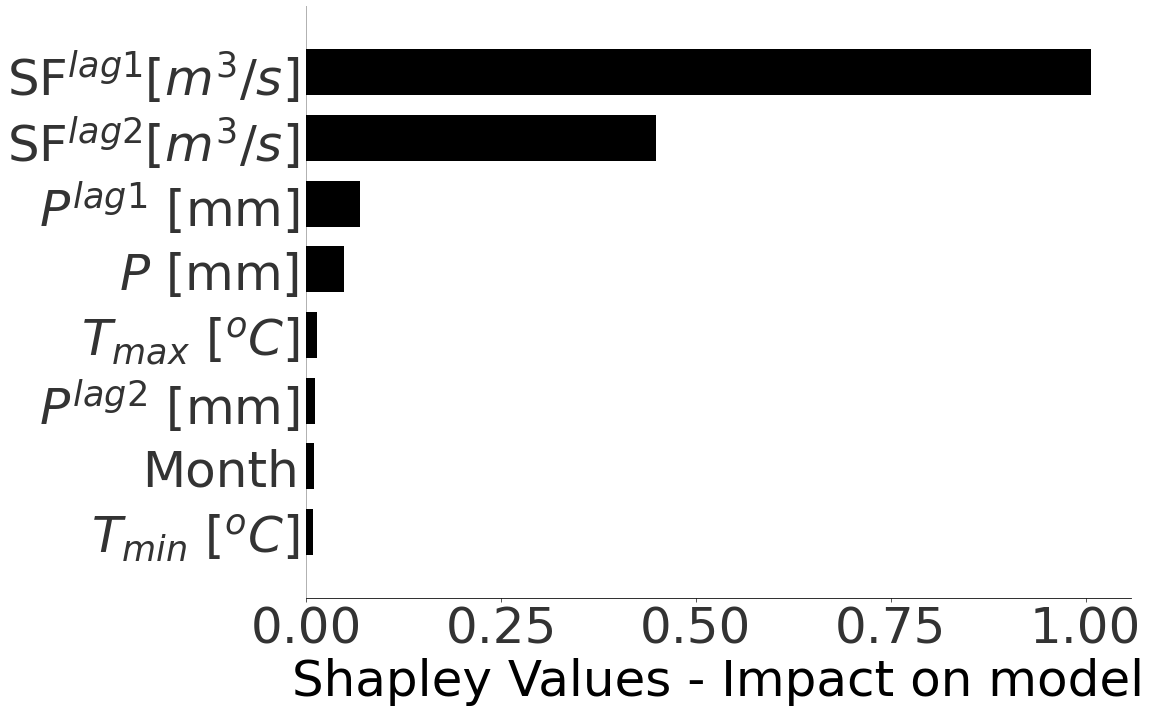

In [22]:

shap.summary_plot(shap_values, df_AI[Features].to_numpy(), 
                  Features, plot_size=(16,10), show=False, 
                  plot_type = "bar", color = "black")
plt.xlabel('Shapley Values - Impact on model', fontsize=50)
plt.tick_params(labelsize=50)
plt.tight_layout(pad=1.08)
plt.savefig(save_features + str('/Feature Importances- Hist.jpg'),
            format='jpeg', dpi=300, bbox_inches ='tight')


**Shapley global & local feature importance plot**

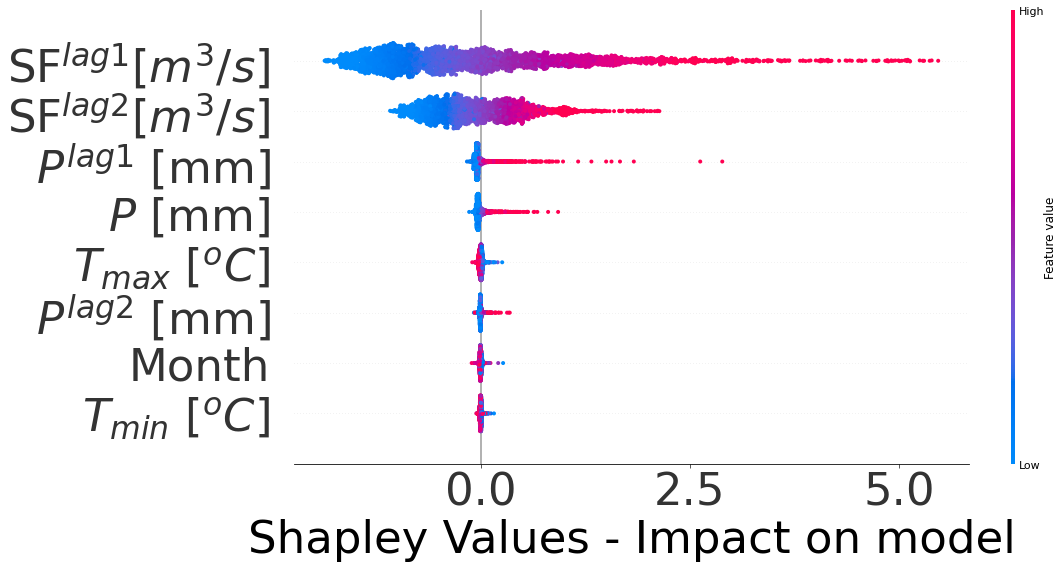

In [23]:
explainer = shap.TreeExplainer(Model)
shap_values = explainer.shap_values(df_AI[Features].to_numpy())

shap.summary_plot(shap_values, df_AI[Features].to_numpy(), 
                      Features, plot_size=(16,8), show=False)
plt.xlabel('Shapley Values - Impact on model', fontsize=45)
plt.tick_params(labelsize=45)
plt.tight_layout(pad=1.08)
plt.savefig(save_features +str('/Feature_Importance_SF.pdf'), 
                    format='jpeg', dpi=300, bbox_inches ='tight')

**Collage of the top 4 important features according to shapley**

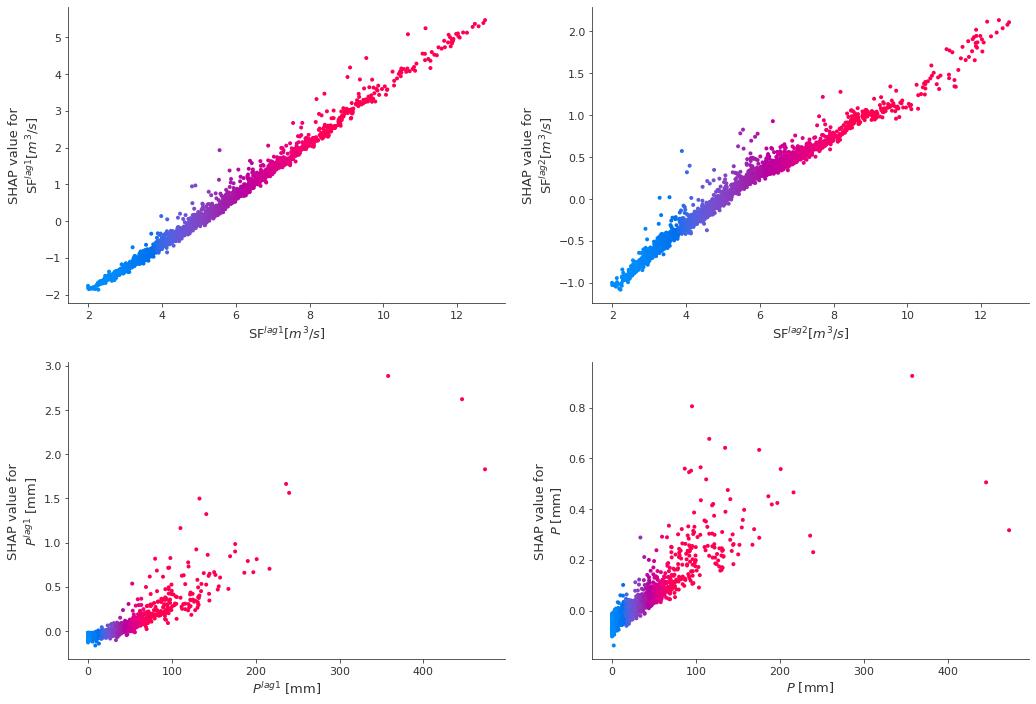

In [24]:
interaction_collage(df_AI,'SF$^{lag1} [m^3/s]$', 
                    '$P^{lag1}$ [mm]',
                    'SF$^{lag2} [m^3/s]$',
                    '$P$ [mm]', save_features)


**Save all feature importance plots**

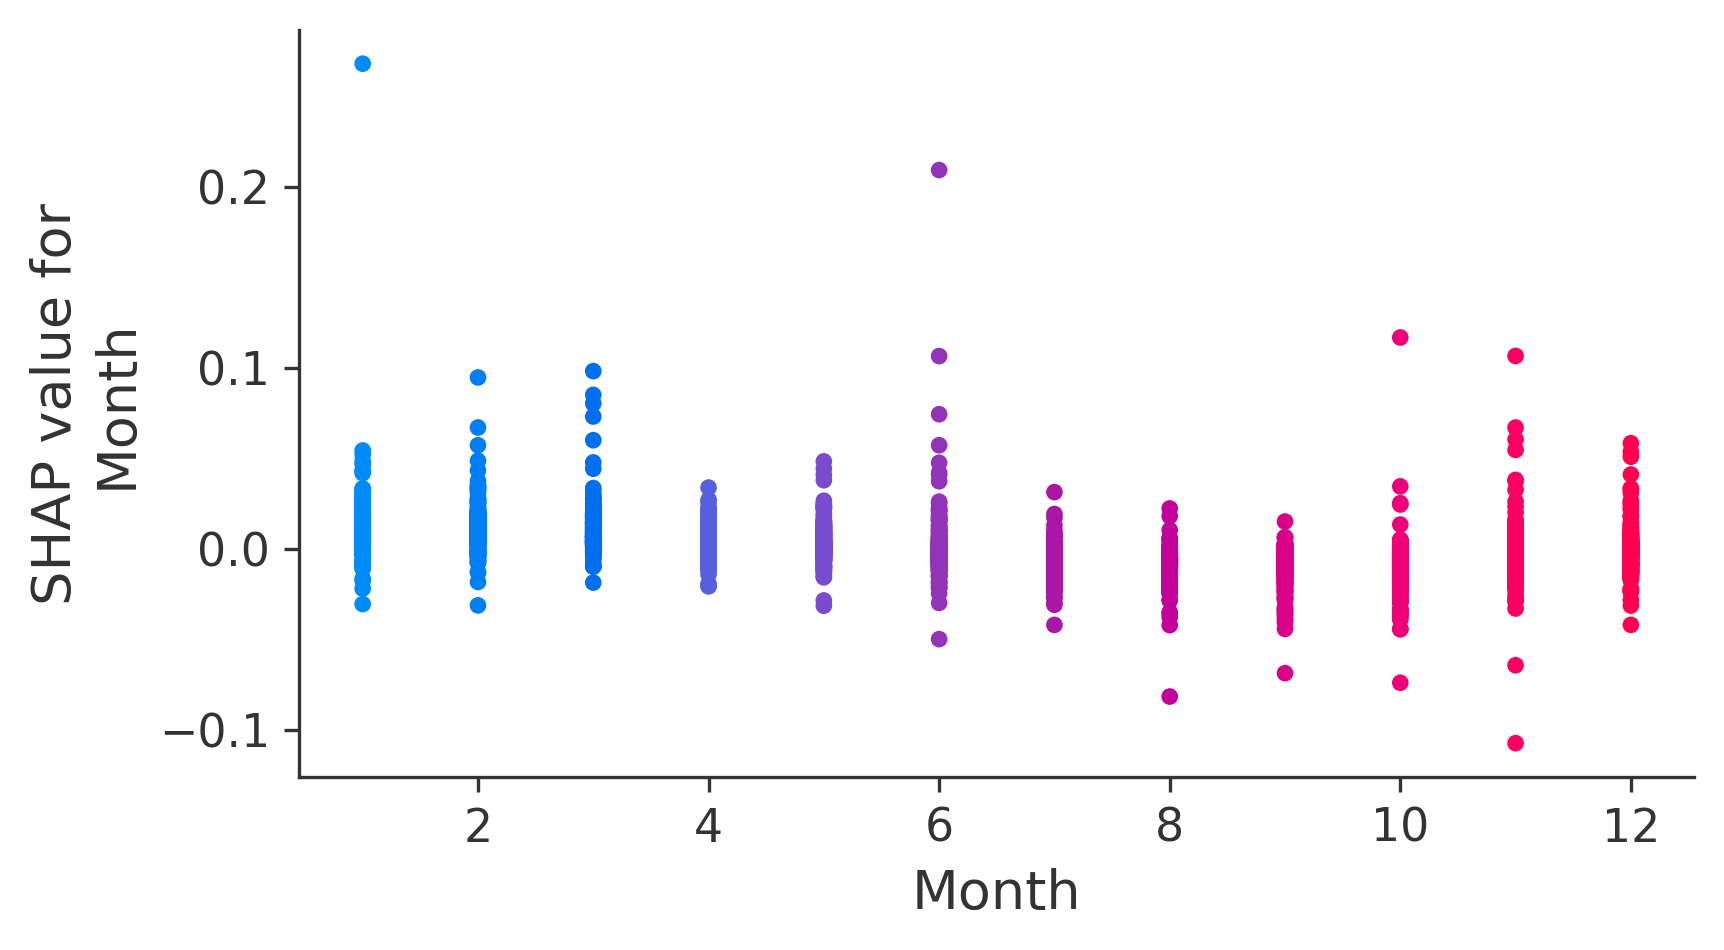

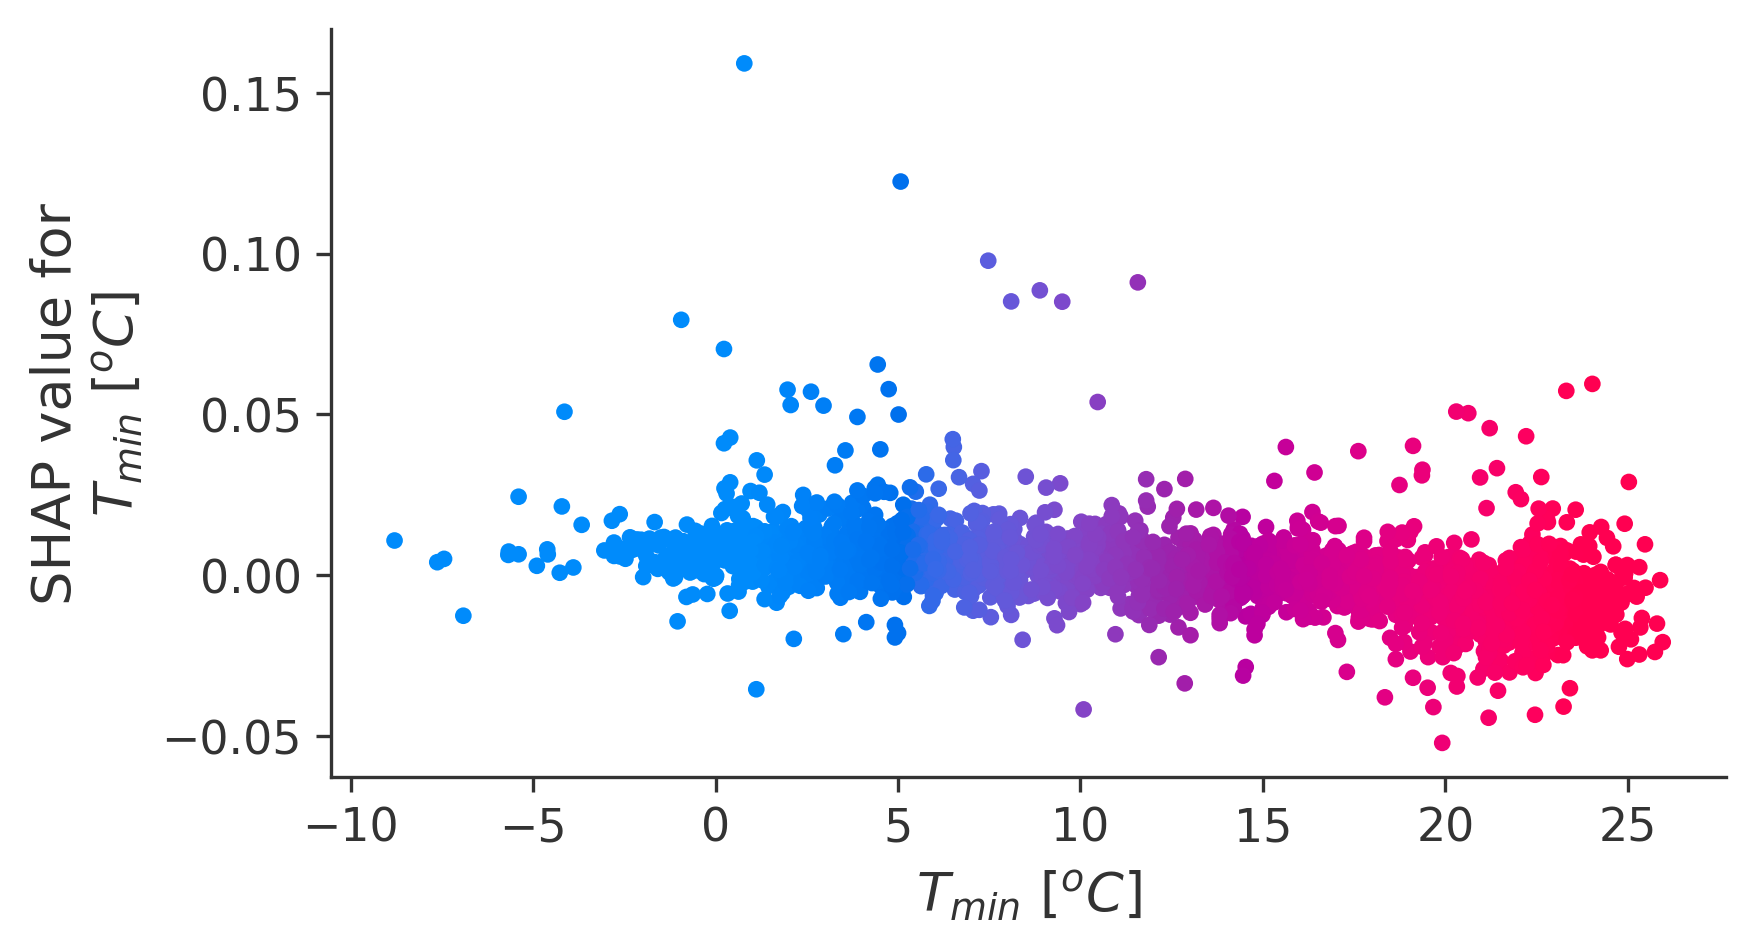

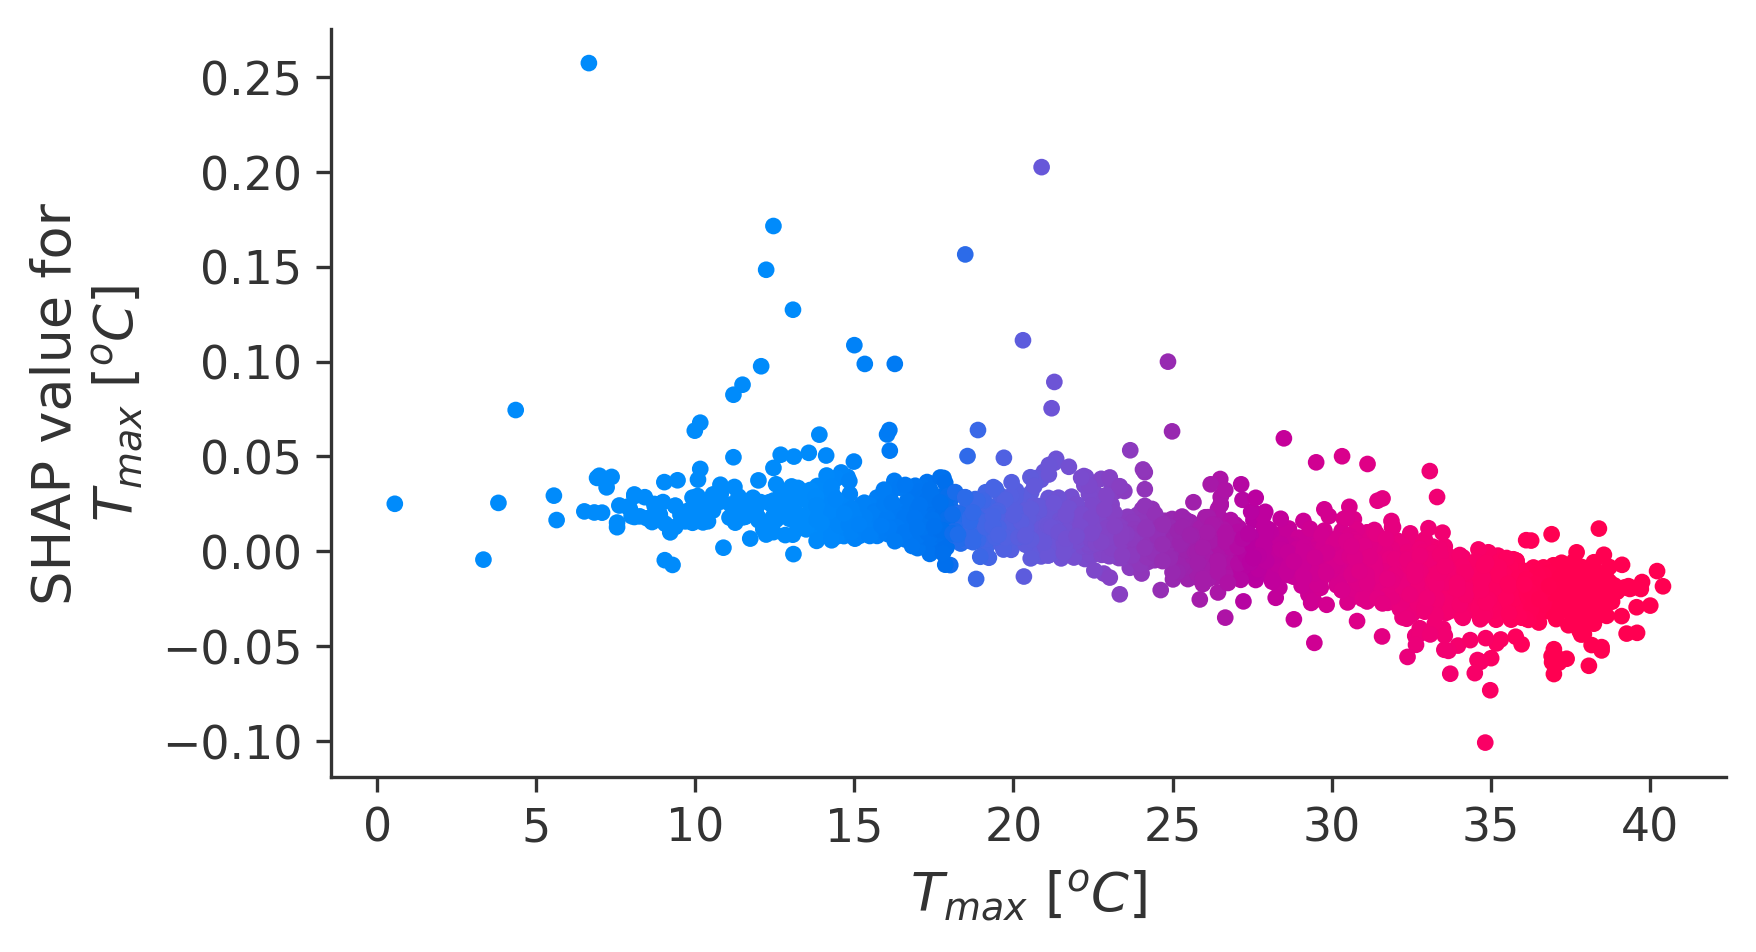

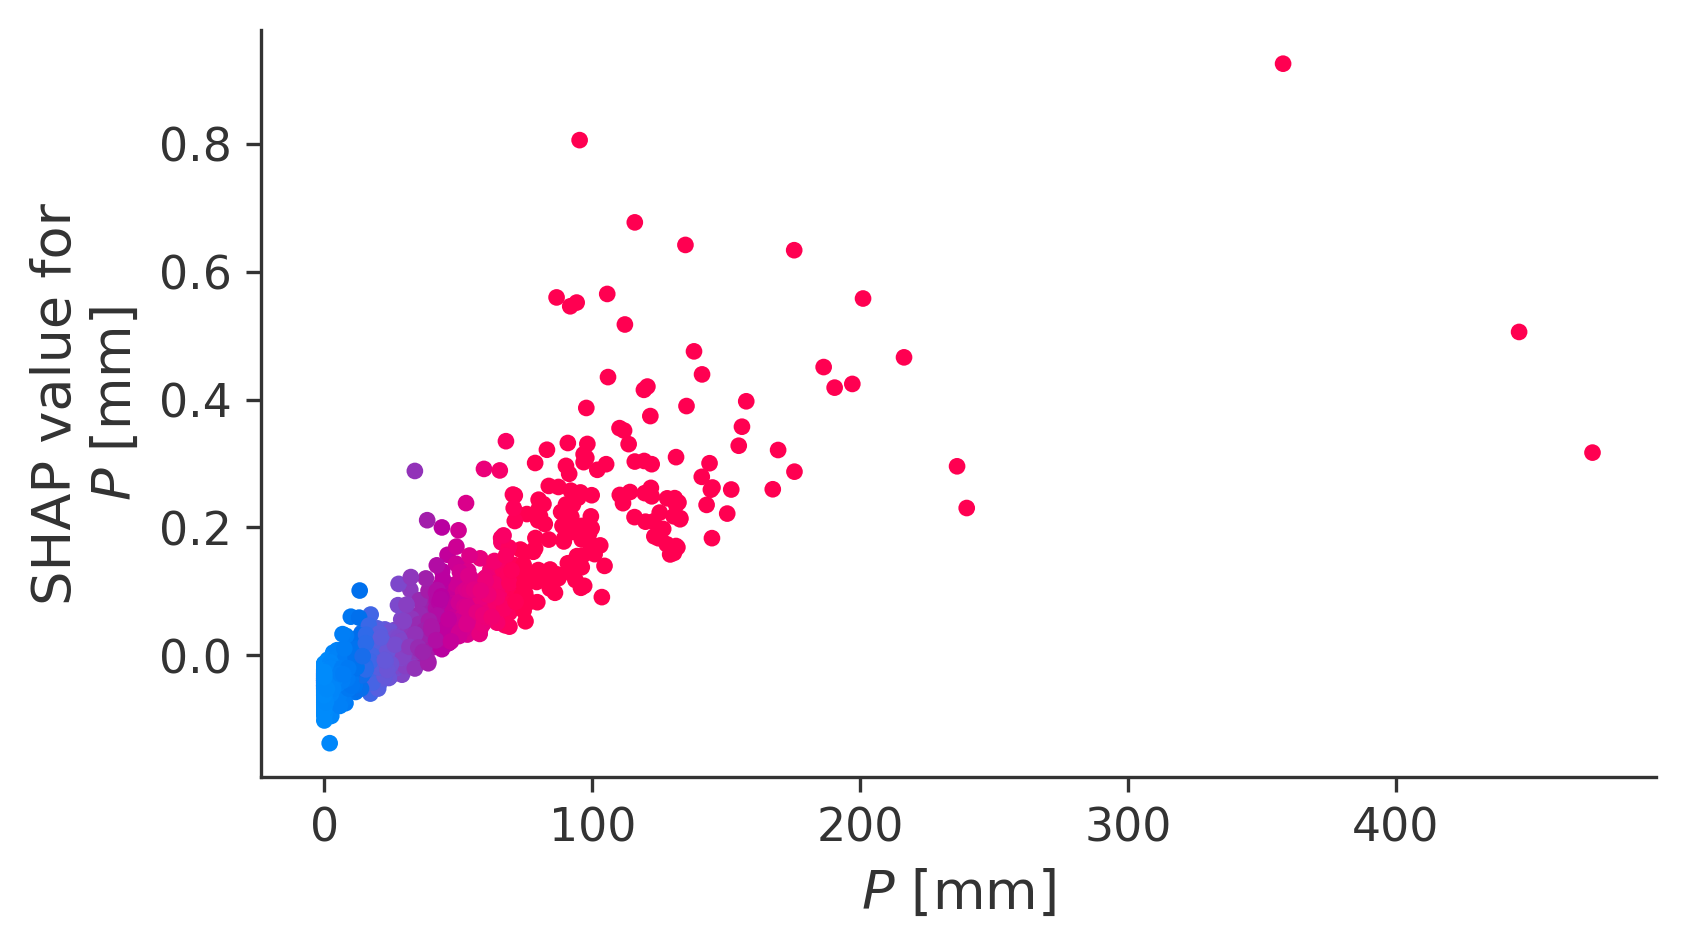

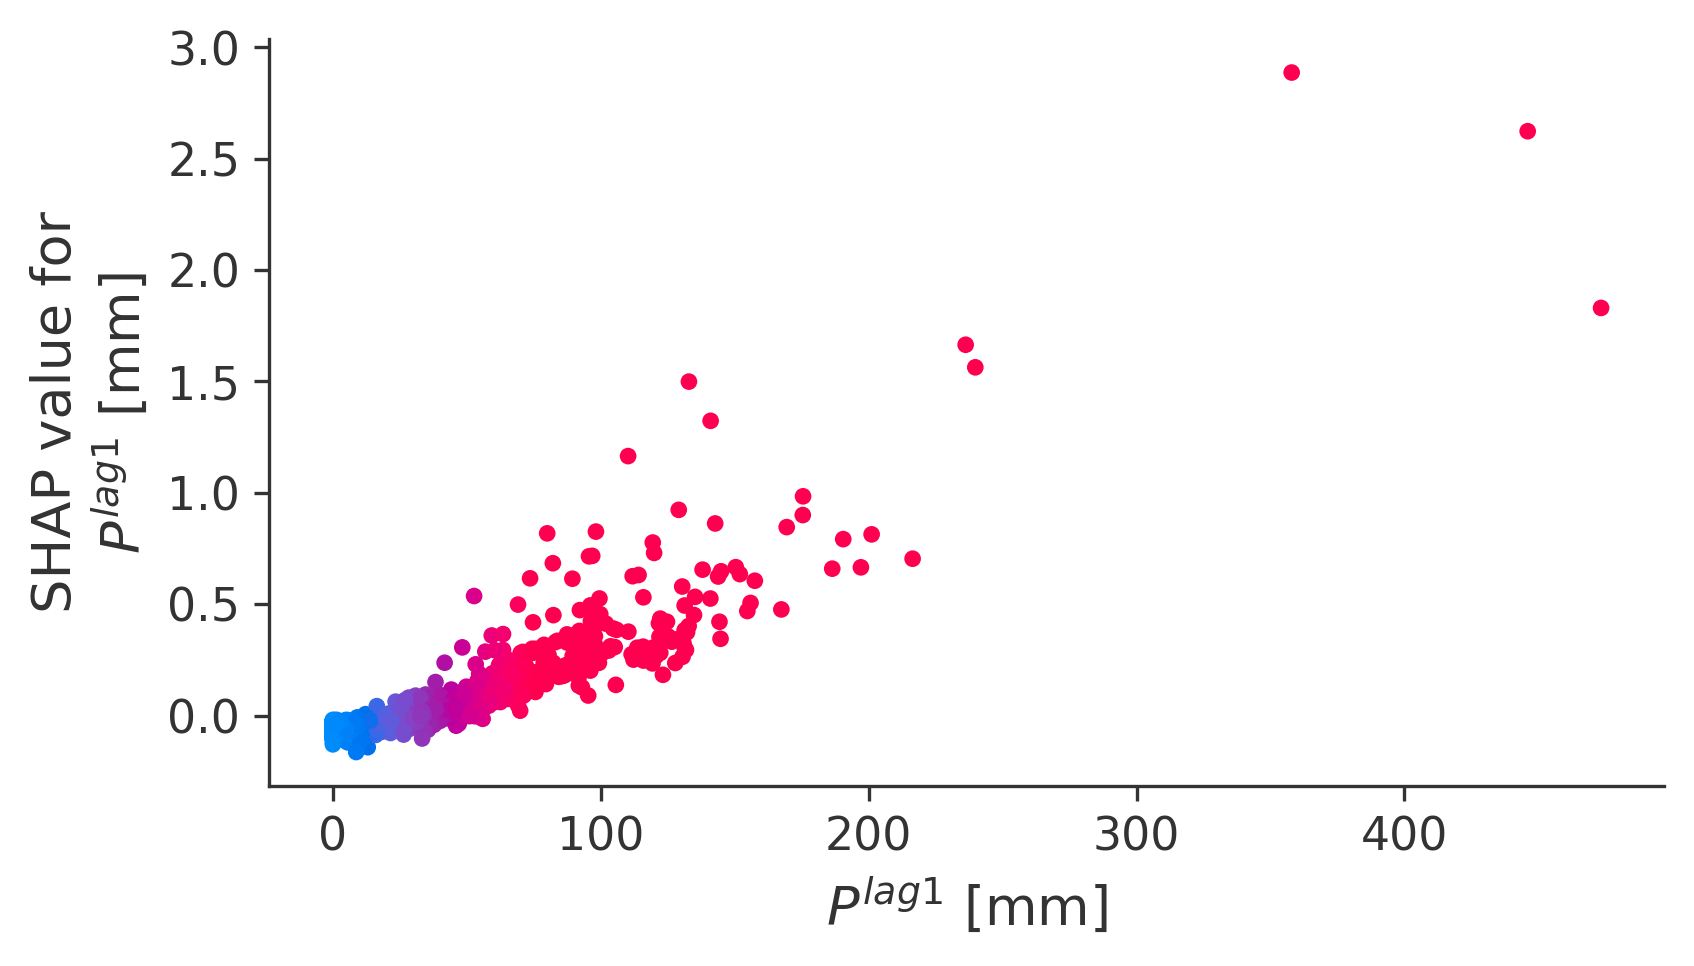

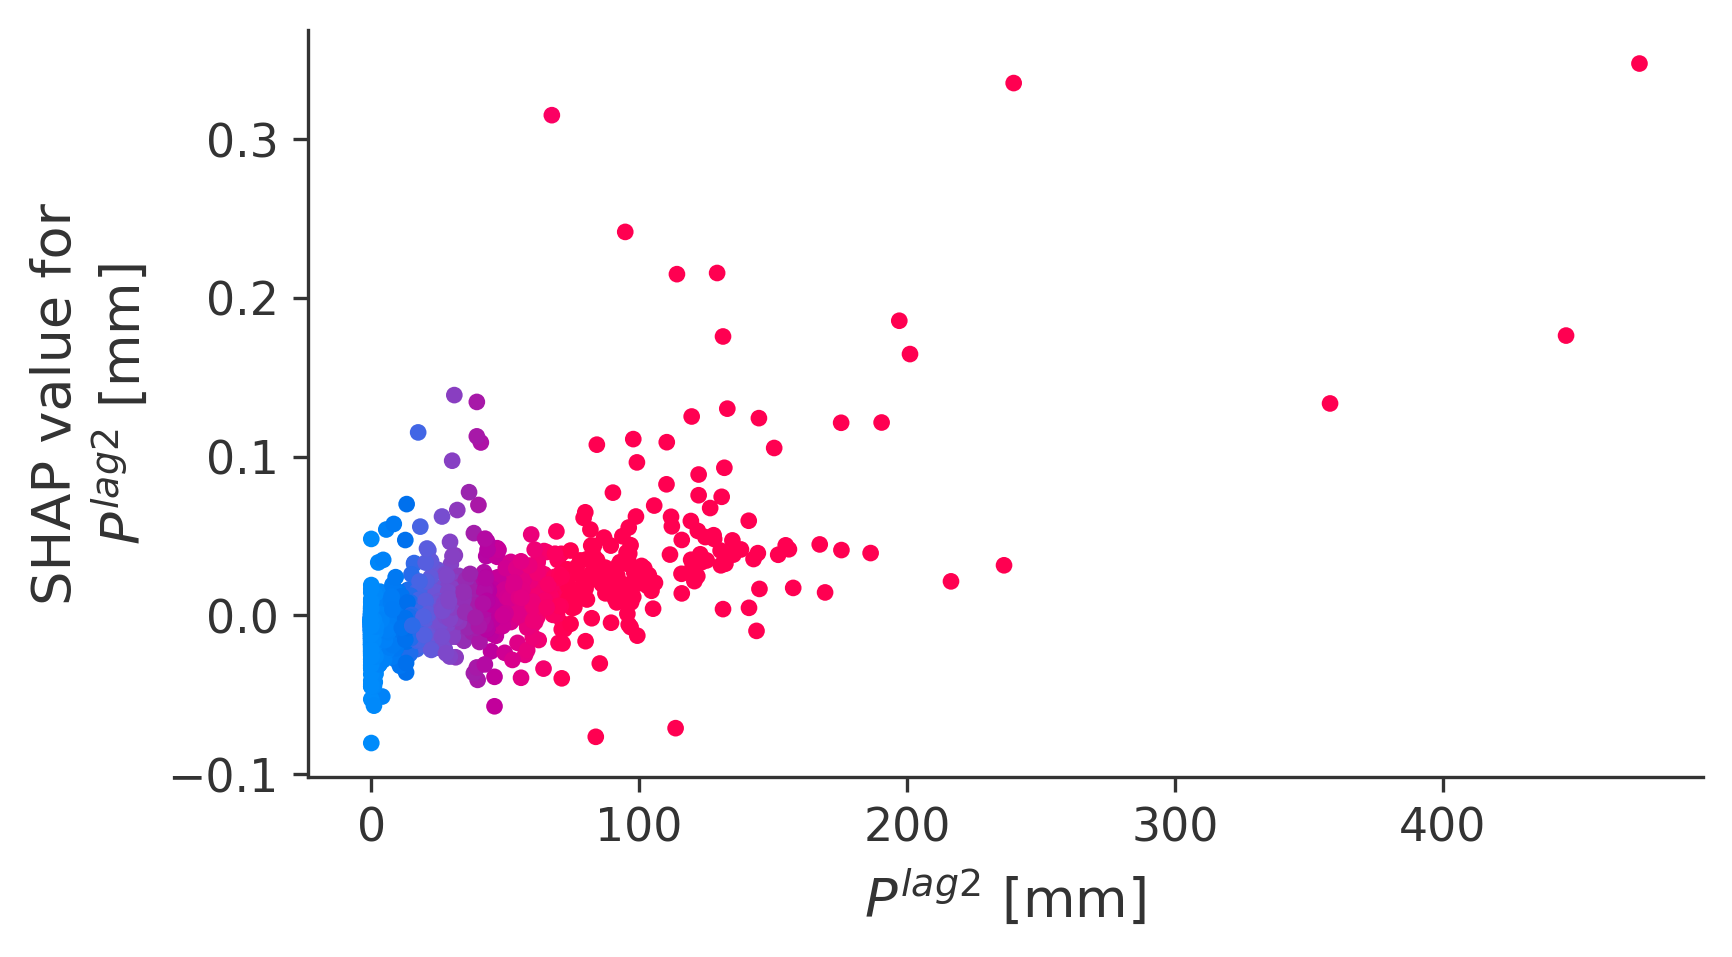

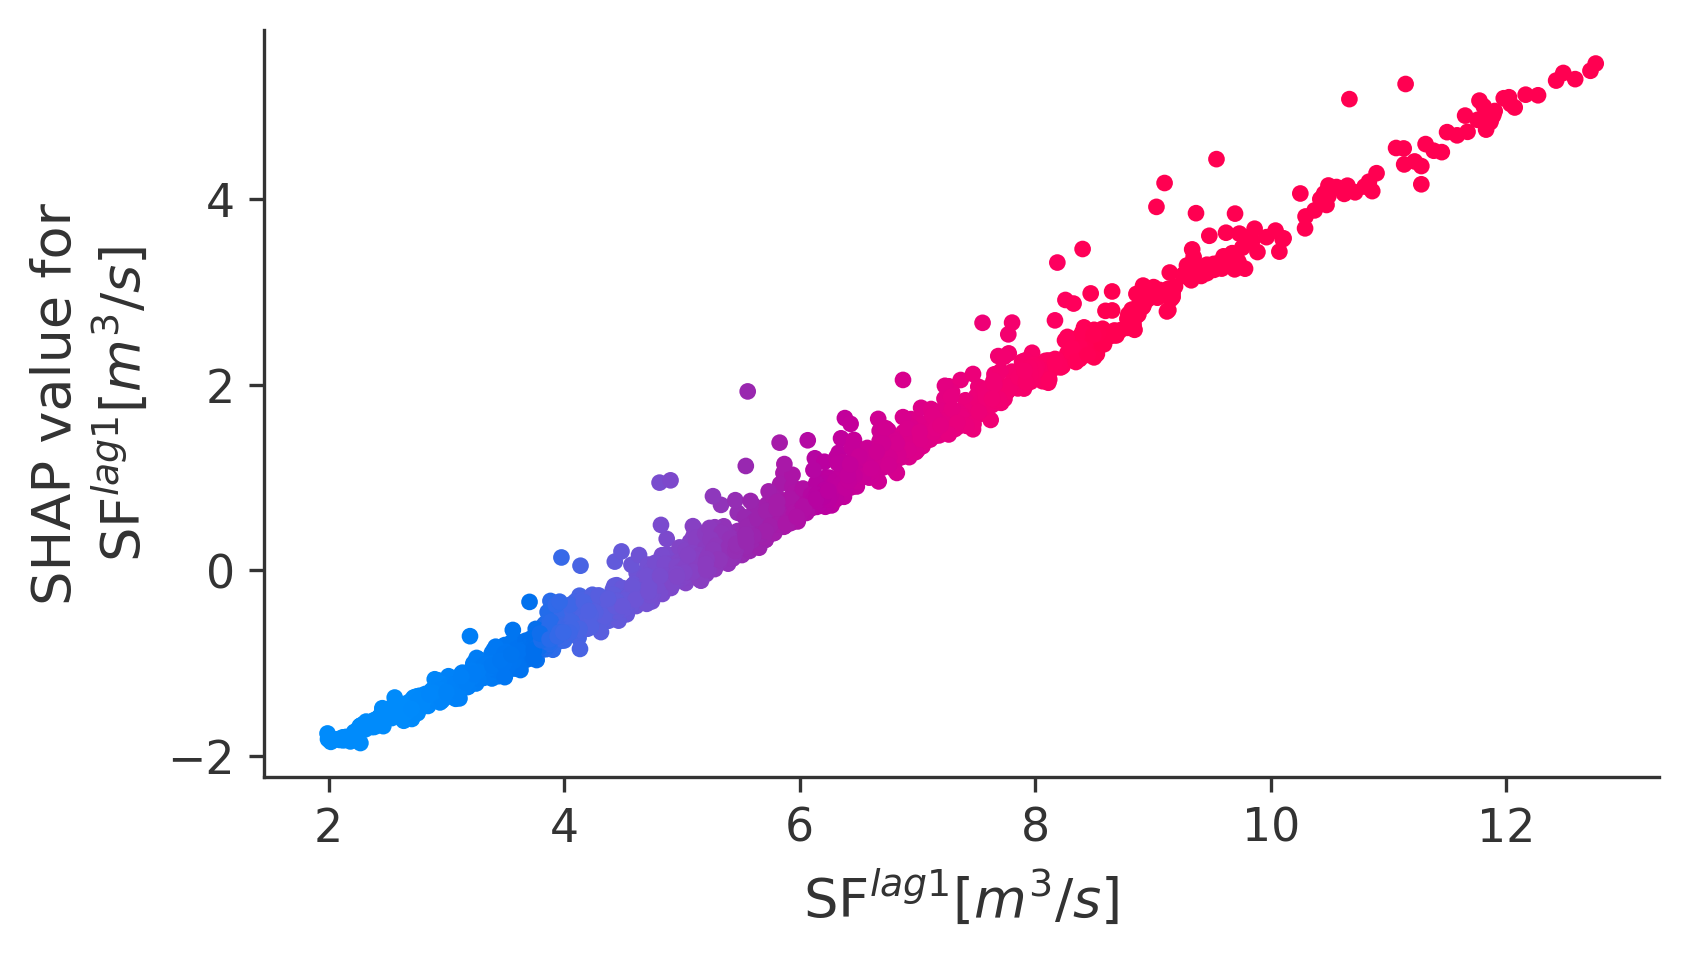

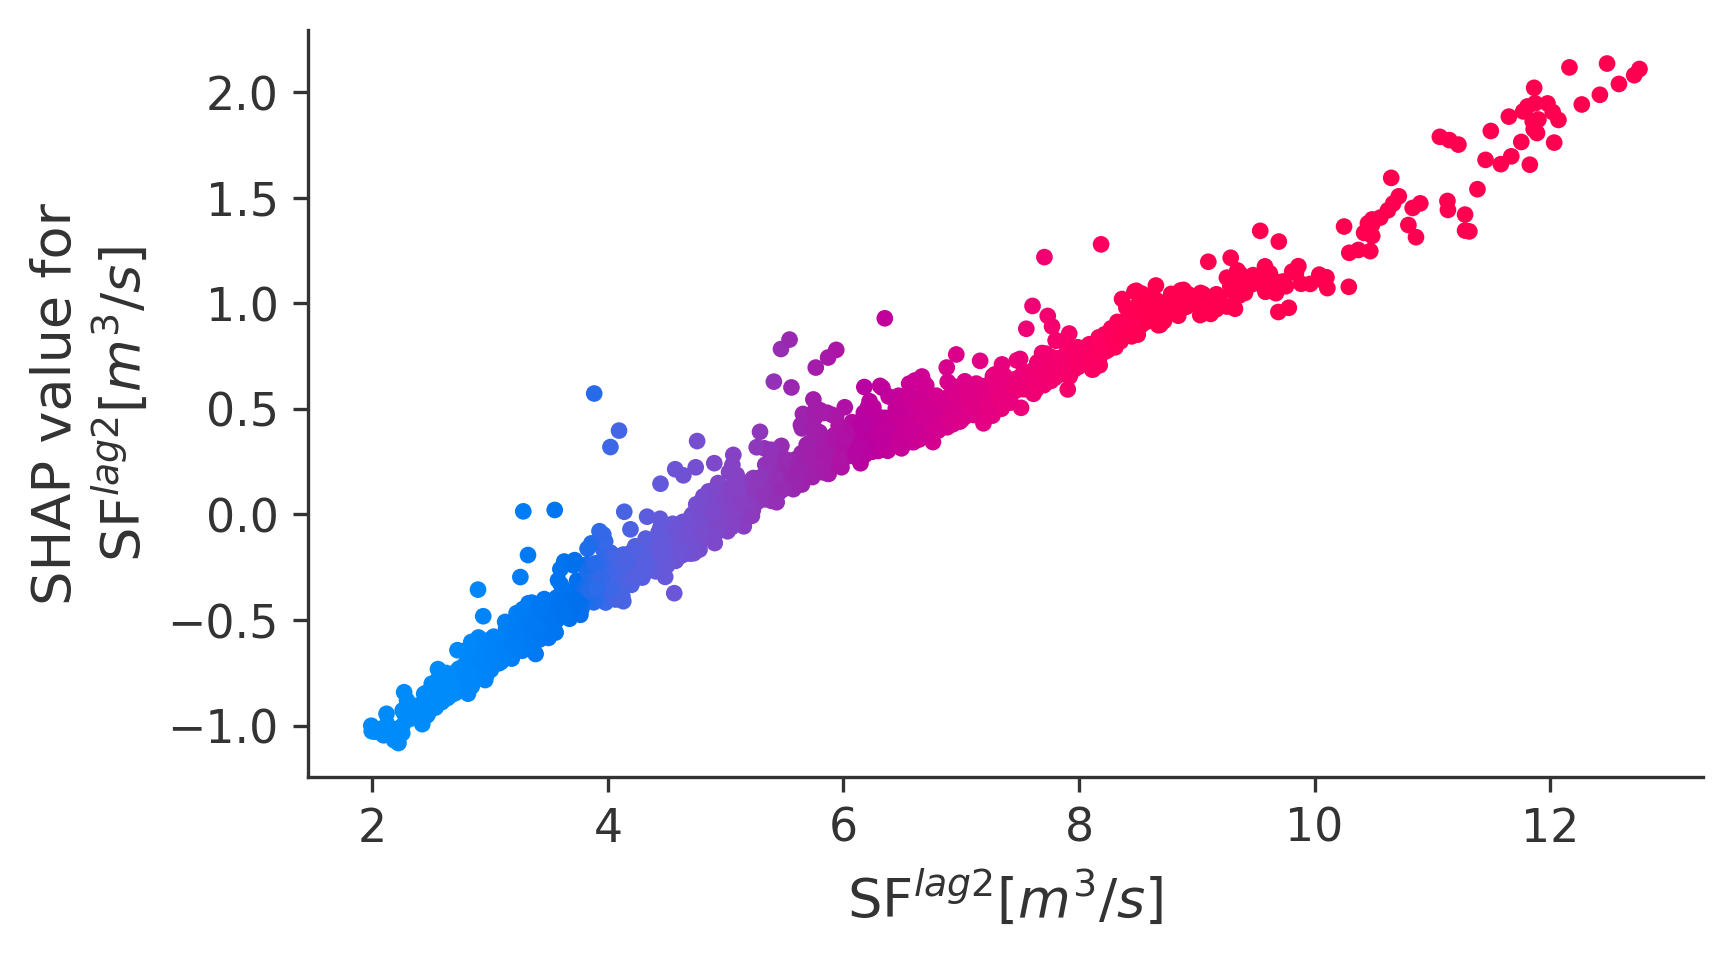

In [25]:
Features_= save_all_features(Features,save_features)

# Climate change analysis

## RCP 4.5

############ Model Validation set Accuracy RCP 4.5###########
MAE: 0.766 m/s^3
NSE: 0.743
RMS: 0.981 m/s^3
R-squared: 0.743
########################################
 
########################################
 


,Month,$T_{min}$ [$^oC$],$T_{max}$ [$^oC$],$P$ [mm],SF$[m^3/s]$
count,4905.000000,4905.000000,4905.000000,4905.000000,4905.000000
mean,6.523140,15.314050,27.565295,18.331668,5.026814
std,3.448811,7.594818,7.686965,30.306268,1.153489
min,1.000000,-13.247194,1.649962,0.000000,2.483915
25%,4.000000,8.969184,21.723034,1.096888,4.107566
50%,7.000000,16.252326,28.120281,6.868069,4.918423
75%,10.000000,22.412757,33.922933,22.895137,5.964996
max,12.000000,27.602197,46.927602,400.595908,9.258148


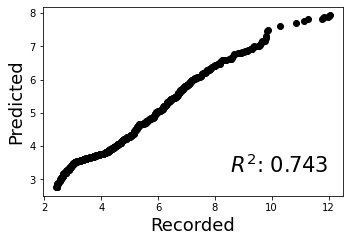

In [26]:
######## RCP(rcp_dataframe,df_AI, model, scenerio, save_to)
df_future_45= RCP(df_RCP45_MACA,df_AI,Model, 4.5, saveRCP_45)
df_future_45.describe()

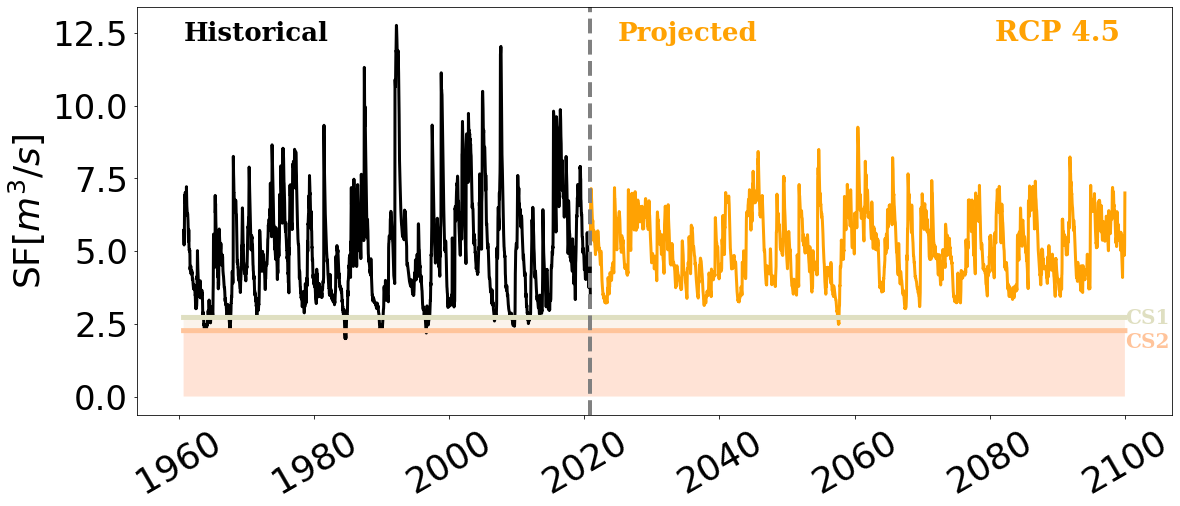

In [27]:
plot_projections(df_future_45,df_AI,4.5,saveRCP_45)

**Shapley global & local feature importance plot**

In [28]:
explainer = shap.TreeExplainer(Model)
shap_values = explainer.shap_values(df_future_45[Features].to_numpy())

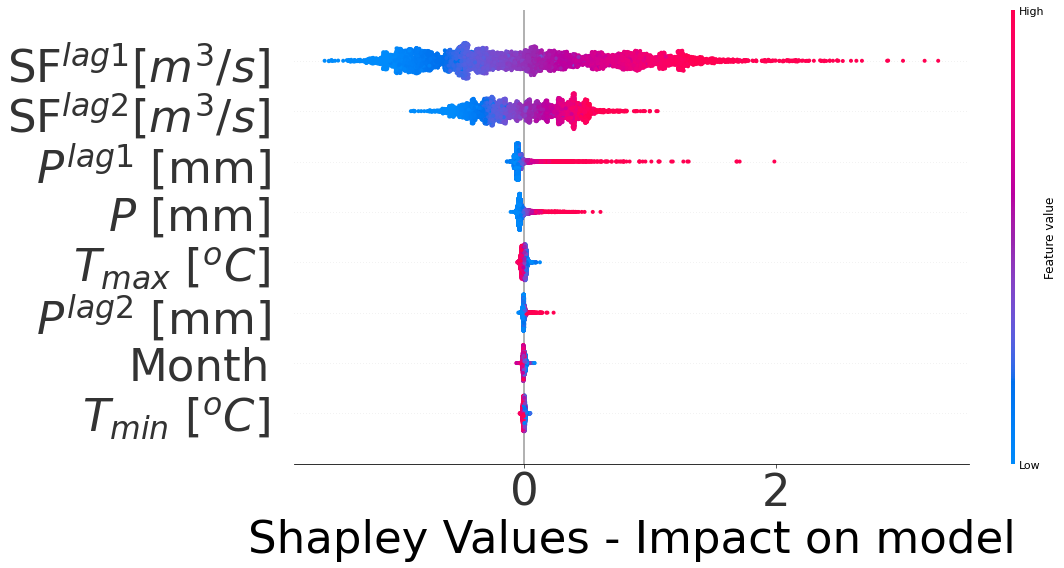

In [29]:
shap.summary_plot(shap_values,
                  df_future_45[Features].to_numpy(),
                  Features, plot_size=(16,8), show=False)
plt.xlabel('Shapley Values - Impact on model', fontsize=45)
plt.tick_params(labelsize=45)
plt.tight_layout(pad=1.08)
plt.savefig(saveRCP_45+str('/SF - RCP45.pdf'), 
            format='pdf', dpi=300, bbox_inches ='tight')

**Collage of the top 4 important features according to shapley**

In [30]:
df_future_45.describe()
df_future_45.to_excel(saveRCP_45+str('/df_future_RCP45.xlsx'))

## Project 8.5

############ Model Validation set Accuracy RCP 8.5###########
MAE: 0.532 m/s^3
NSE: 0.883
RMS: 0.662 m/s^3
R-squared: 0.883
########################################
 
########################################
 


,Month,$T_{min}$ [$^oC$],$T_{max}$ [$^oC$],$P$ [mm],SF$[m^3/s]$
count,4905.000000,4905.000000,4905.000000,4905.000000,4905.000000
mean,6.523140,16.319405,28.520078,17.720022,4.915728
std,3.448811,7.637947,8.005025,28.829254,1.235032
min,1.000000,-5.535311,-2.486796,0.000000,2.285510
25%,4.000000,9.996485,22.546616,0.968823,4.001693
50%,7.000000,17.275424,29.093147,6.641290,4.722274
75%,10.000000,23.416960,34.901387,21.654703,5.810225
max,12.000000,29.437982,46.867452,341.637357,9.198066


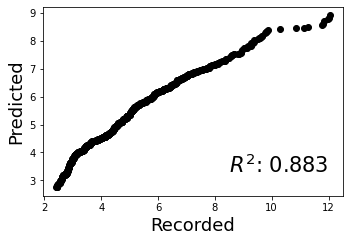

In [31]:
######## RCP(rcp_dataframe,df_AI, model, scenerio, save_to)

df_future_85= RCP(df_RCP85_MACA,df_AI,Model, 8.5, saveRCP_85)

df_future_85.describe()

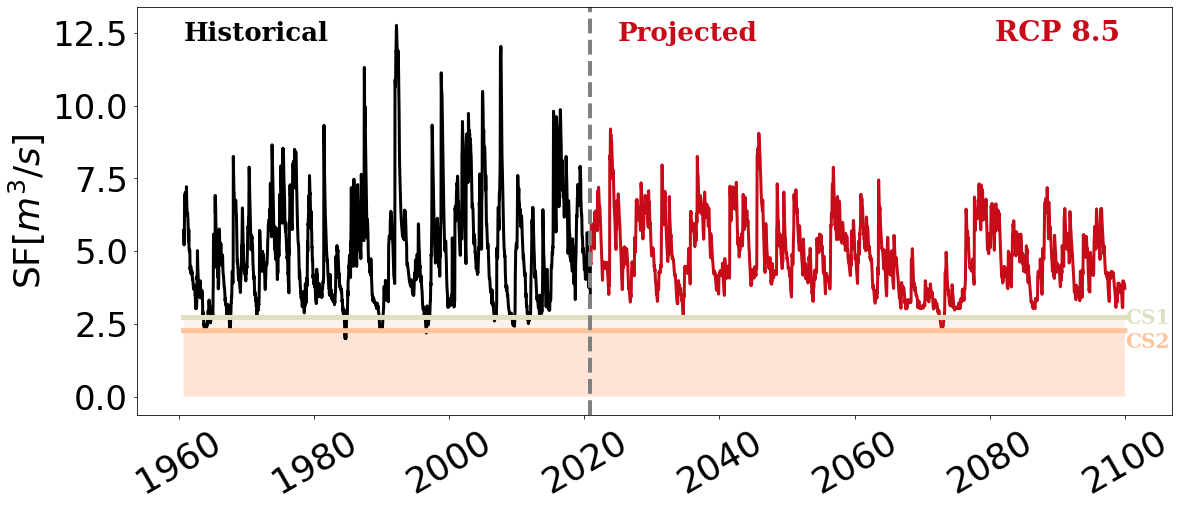

In [32]:
plot_projections(df_future_85,df_AI,8.5,saveRCP_85)

In [33]:
df_future_85.to_excel(saveRCP_85+str('/df_future_RCP85.xlsx'))

# Check the relationship with the evaportaion and soil moisture

In [34]:
df_read = df_AI.copy()

In [35]:

df_AI2 = pd.DataFrame()

df_AI2['$T_{min}$ [$^oC$]'] = df_read['$T_{min}$ [$^oC$]'].resample('M').mean()
df_AI2['$T_{max}$ [$^oC$]'] = df_read['$T_{max}$ [$^oC$]'].resample('M').mean()
df_AI2['$P$ [mm]'] = df_read['$P$ [mm]'].resample('M').sum()


df_AI2 = (df_AI2[(df_AI2.index >= '1960-09-01')& (df_AI2.index <= Approved_date)])

df_AI2

,$T_{min}$ [$^oC$],$T_{max}$ [$^oC$],$P$ [mm]
DATE,,,
1960-09-30,16.735714,32.971429,0.0
1960-10-31,16.074286,28.380000,315.3
1960-11-30,10.300000,21.432143,64.3
1960-12-31,2.892857,15.025000,59.3
1961-01-31,2.434286,14.077143,62.0
...,...,...,...
2020-06-30,21.642857,32.946429,68.9
2020-07-31,24.396429,36.832143,22.3
2020-08-31,23.425714,37.662857,36.0


In [36]:
TErraclimate = pd.read_csv('terraclimate.csv',
                           skiprows=13, usecols= ['aet(mm)','soil(mm)'])

TErraclimate=TErraclimate.rename(columns = {"aet(mm)":"$ET$ [mm]", 'soil(mm)': '$SM$ [mm]'})


TErraclimate  =TErraclimate.iloc[32:,:]
TErraclimate = TErraclimate.iloc[:-2,:]

TErraclimate

,$ET$ [mm],$SM$ [mm]
32,24.9,23.4
33,114.8,133.2
34,66.4,121.1
35,65.1,152.1
36,45.9,137.7
...,...,...
749,91.3,16.6
750,40.4,15.5
751,12.1,14.6
752,141.1,80.7


In [37]:
SF_Terraclimate = Sf_data.resample('M').mean()

SF_Terraclimate = (SF_Terraclimate[(SF_Terraclimate.index>= '1960-09-30')& (SF_Terraclimate.index<= '2020-10-31')])

SF_Terraclimate


,SF$[m^3/s]$
Date,
1960-09-30,5.721767
1960-10-31,5.400968
1960-11-30,6.761767
1960-12-31,6.845935
1961-01-31,6.729097
...,...
2020-06-30,5.414233
2020-07-31,4.772710
2020-08-31,3.947000


In [38]:
df_AI2 = pd.concat([df_AI2,SF_Terraclimate],axis=1)


In [39]:
#df_AI['$R_w$ [mm]'] = df_AI['$R_w$ [mm]'].to_numpy()
df_AI2['$SM$ [mm]'] = TErraclimate['$SM$ [mm]'].to_numpy()
df_AI2['$ET$ [mm]'] = TErraclimate['$ET$ [mm]'].to_numpy()
df_AI2.describe()

,$T_{min}$ [$^oC$],$T_{max}$ [$^oC$],$P$ [mm],SF$[m^3/s]$,$SM$ [mm],$ET$ [mm]
count,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000
mean,13.562576,26.464571,75.665111,4.998356,62.911496,68.299169
std,7.193569,6.970855,71.998064,1.847586,51.354399,38.025257
min,-1.436429,10.310714,0.000000,2.043367,8.100000,1.200000
25%,6.887500,20.466964,25.242006,3.559840,23.700000,40.800000
50%,13.870000,27.163929,57.300000,4.658229,45.450000,62.050000
75%,20.563214,32.646429,101.275000,6.049533,89.475000,91.750000
max,25.360714,39.421429,642.000000,12.611161,251.300000,182.800000


In [40]:
# Pumping patterns is hypothesized to be associated with the month
df_AI2['Month'] = df_AI2.index.month 

# There could be some lag effects in the hydroclimatic behavior for Karst aquifers
df_AI2['$T_{max}^{lag1}$ [$^oC$]'] = df_AI2['$T_{max}$ [$^oC$]'].shift(1)
df_AI2['$T_{max}^{lag2}$ [$^oC$]'] = df_AI2['$T_{max}$ [$^oC$]'].shift(2)

df_AI2['$T_{min}^{lag1}$ [$^oC$]'] = df_AI2['$T_{min}$ [$^oC$]'].shift(1)
df_AI2['$T_{min}^{lag2}$ [$^oC$]'] = df_AI2['$T_{min}$ [$^oC$]'].shift(2)

df_AI2['$P^{lag1}$ [mm]'] = df_AI2['$P$ [mm]'].shift(1)
df_AI2['$P^{lag2}$ [mm]'] = df_AI2['$P$ [mm]'].shift(2)

df_AI2['SF$^{lag1} [m^3/s]$'] = df_AI2['SF$[m^3/s]$'].shift(1)
df_AI2['SF$^{lag2} [m^3/s]$'] = df_AI2['SF$[m^3/s]$'].shift(2)

df_AI2.dropna(inplace=True)


In [41]:

Features = ['Month','$T_{min}$ [$^oC$]','$T_{max}$ [$^oC$]','$P$ [mm]',
            '$P^{lag1}$ [mm]','$P^{lag2}$ [mm]','$SM$ [mm]','$ET$ [mm]',
            'SF$^{lag1} [m^3/s]$','SF$^{lag2} [m^3/s]$']

#SpringFlow for Comal = Target
Target = ['SF$[m^3/s]$']


#Take the tain set till 2005 and test set from 2006 till 2020

df_AI2_Train = df_AI2[:'2005-12-31']
df_AI2_Test = df_AI2['2006-01-01':]

#Create Independent and dependent variable for machine learning
X = df_AI2[Features].to_numpy()
Y = df_AI2[Target].to_numpy()
test_X = df_AI2_Test[Features].iloc[0].to_numpy().reshape(1, -1)

In [42]:
train_X = df_AI2_Train[Features].to_numpy()
y_train = df_AI2_Train[Target].to_numpy()

Model = ExtraTreesRegressor() 
Model = Model.fit(train_X, y_train)

RMS = np.sqrt(mean_squared_error(y_train,Model.predict(train_X)))
RSQ = r2_score(y_train,Model.predict(train_X))
MAE = np.mean(np.abs((y_train -Model.predict(train_X)))) 
NSE = NSE(Model.predict(train_X),y_train)


print("############ Model Accuracy -Training set ############")
print("MAE: %0.3f" % MAE,'m/s^3')
print("NSE: %0.3f" % NSE)
print("RMS: %0.3f" % RMS, 'm/s^3')
print("R-squared: %0.3f" % RSQ)
print("########################################")
print(" ")


############ Model Accuracy -Training set ############
MAE: 1.982 m/s^3
NSE: 1.000
RMS: 0.000 m/s^3
R-squared: 1.000
########################################
 


In [43]:

##################################################################
# Make predictions on Testing data and Test model accuracy
###################################################################
df_AI2_Test['SF$^{pred} [m^3/s]$'] = 0
Test_X = df_AI2_Test[Features].iloc[0].to_numpy().reshape(1, -1)
df_AI2_Test['SF$^{pred} [m^3/s]$'].iloc[0] = Model .predict(Test_X)[0]

i = 0
for row in df_AI2_Test.itertuples():
    df_AI2_Test['SF$^{lag1} [m^3/s]$'][i+1] = df_AI2_Test['SF$^{pred} [m^3/s]$'].iloc[i] 
    df_AI2_Test['SF$^{lag2} [m^3/s]$'][i+1] = df_AI2_Test['SF$^{lag1} [m^3/s]$'].iloc[i]  
    Test_X = df_AI2_Test[Features].iloc[i+1].to_numpy().reshape(1, -1)
    df_AI2_Test['SF$^{pred} [m^3/s]$'].iloc[i+1] = Model.predict(Test_X)[0]
    i = i+1
    if i == (len(df_AI2_Test)-1):
        break
RMS = np.sqrt(mean_squared_error(df_AI2_Test['SF$[m^3/s]$'].sort_values(ascending=True).to_numpy(),
                  df_AI2_Test['SF$^{pred} [m^3/s]$'].sort_values(ascending=True).to_numpy()))
RSQ = r2_score(df_AI2_Test['SF$[m^3/s]$'].sort_values(ascending=True).to_numpy(),
               df_AI2_Test['SF$^{pred} [m^3/s]$'].sort_values(ascending=True).to_numpy())
MAE = np.mean(np.abs(df_AI2_Test['SF$[m^3/s]$'].sort_values(ascending=True).to_numpy() - 
                     df_AI2_Test['SF$^{pred} [m^3/s]$'].sort_values(ascending=True).to_numpy()))

NSE = he.evaluator(he.nse,df_AI2_Test['SF$^{pred} [m^3/s]$'].sort_values(ascending=True).tolist(),
          df_AI2_Test['SF$[m^3/s]$'].sort_values(ascending=True).tolist())
print("############ Model Accuracy -Test set############")
print("MAE: %0.3f" % MAE,'m/s^3')
print("NSE: %0.3f" % NSE)
print("R-squared: %0.3f" % RSQ)
print("RMS: %0.3f" % RMS, 'm/s^3')
print("########################################")
print(" ")


############ Model Accuracy -Test set############
MAE: 0.383 m/s^3
NSE: 0.905
R-squared: 0.905
RMS: 0.591 m/s^3
########################################
 


In [44]:
Model = Model 

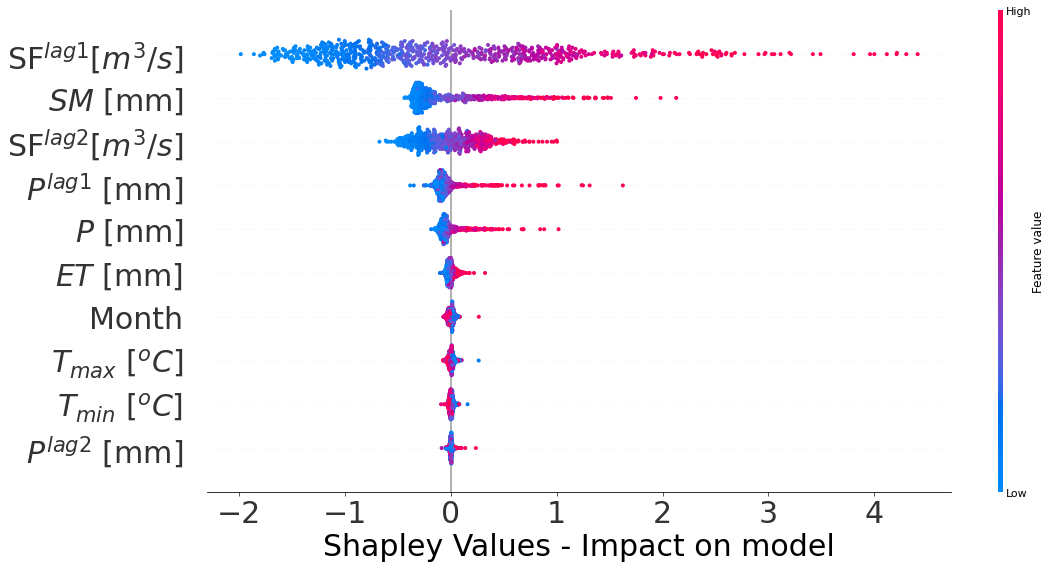

In [45]:
explainer = shap.TreeExplainer(Model)
shap_values = explainer.shap_values(df_AI2[Features].to_numpy())

shap.summary_plot(shap_values, df_AI2[Features].to_numpy(), Features, plot_size=(16,8), show=False)
plt.xlabel('Shapley Values - Impact on model', fontsize=30)
plt.tick_params(labelsize=30)
plt.tight_layout(pad=1.08)
plt.savefig(save_Model +str('/Feature Importance ET-SM- SF.pdf'), format='pdf', dpi=300, bbox_inches ='tight')

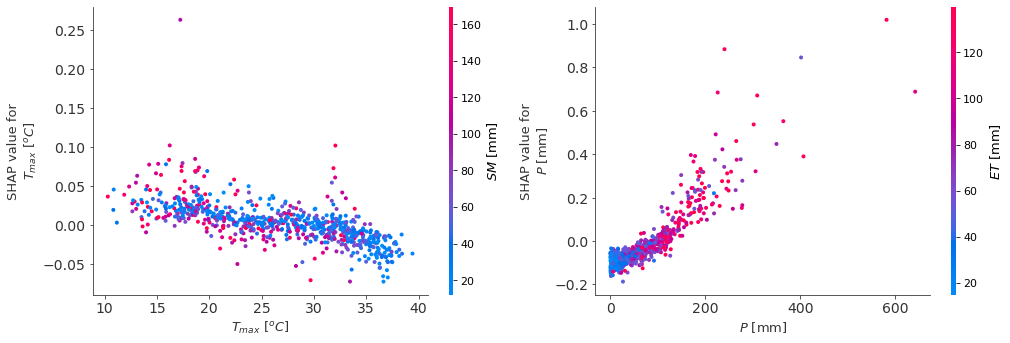

In [46]:
fig = plt.figure(figsize=(16,5),)
gs = fig.add_gridspec(1, 2)
ax1 = fig.add_subplot(gs[0, 0])
   
shap.dependence_plot('$T_{max}$ [$^oC$]', shap_values, df_AI2[Features].to_numpy(),Features, ax=ax1, show=False,
                     interaction_index='$SM$ [mm]')
plt.tick_params(labelsize=14)

ax2 = fig.add_subplot(gs[0,1])
shap.dependence_plot('$P$ [mm]',shap_values, df_AI2[Features].to_numpy(),Features, ax=ax2, show=False,
                     interaction_index='$ET$ [mm]')
plt.tick_params(labelsize=14)


plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.9)

#plt.subplot_tool()

plt.savefig(save_Model +str('/Feature Importance ET-P__T-SM.pdf'), format='pdf', dpi=300, bbox_inches ='tight')

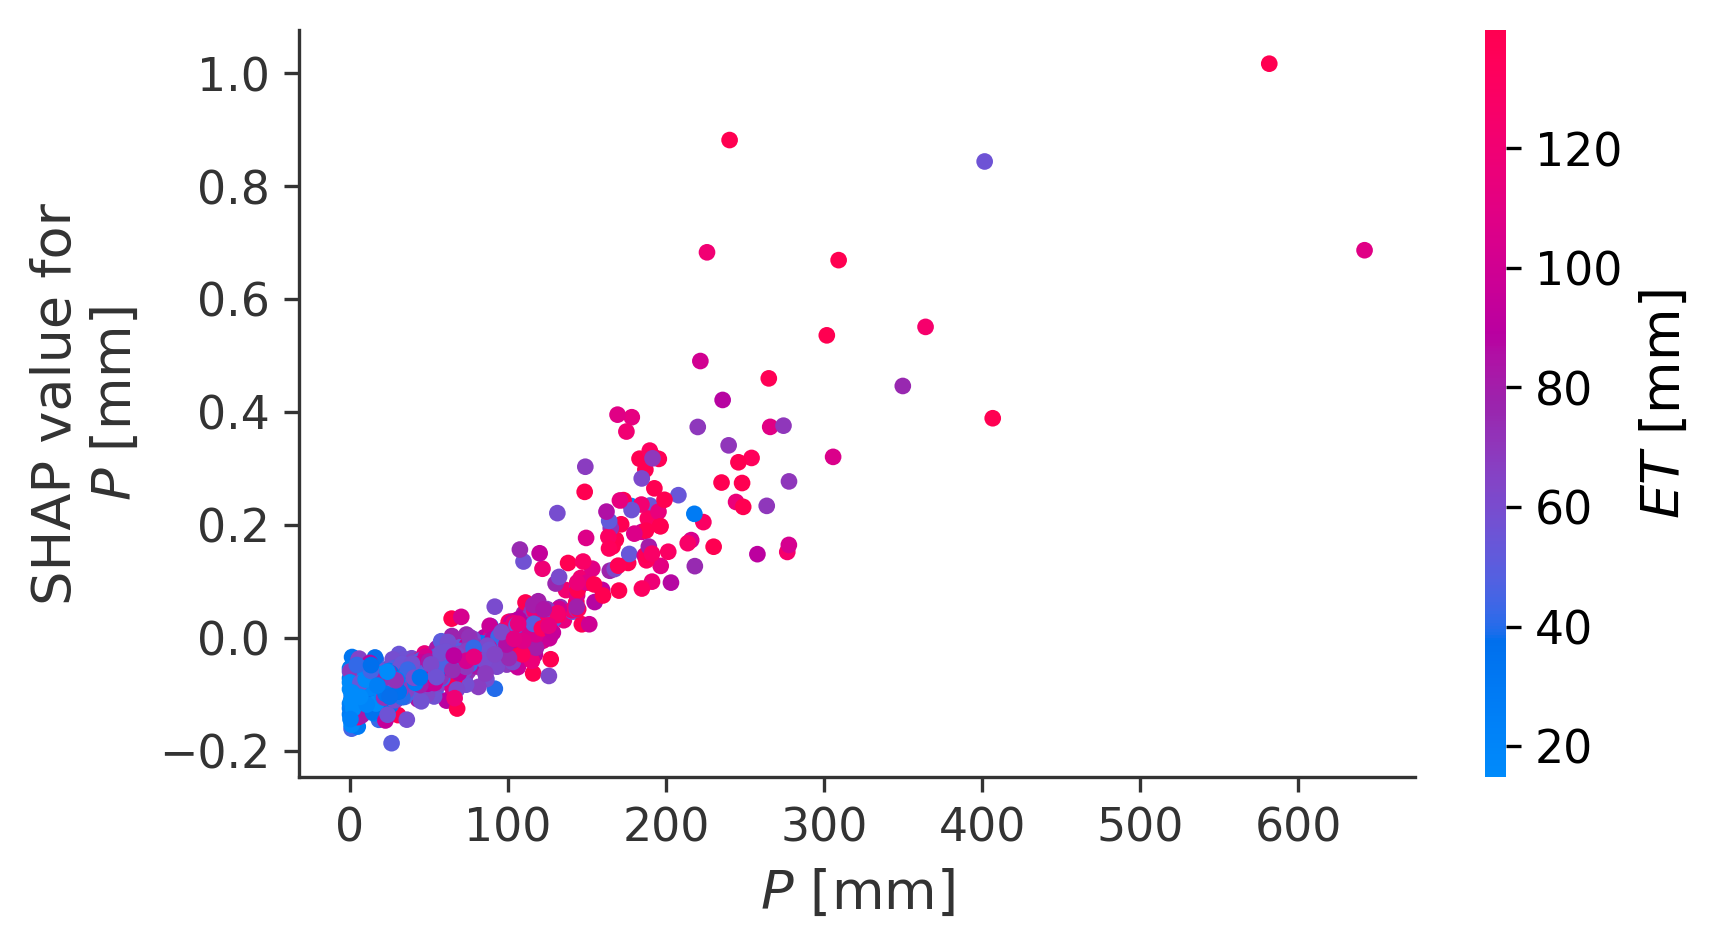

In [47]:
fig = plt.figure(figsize=(6,3.3),dpi=300)
ax1 = fig.add_subplot(1,1,1)

   
shap.dependence_plot('$P$ [mm]',shap_values, df_AI2[Features].to_numpy(),Features, ax=ax1, show=False,
                     interaction_index='$ET$ [mm]')
plt.savefig(save_Model +str('/Feature Interaction_comal_springs  - Pr-ET2 -Comal Hist.jpg'), format='jpeg', dpi=300, bbox_inches ='tight')


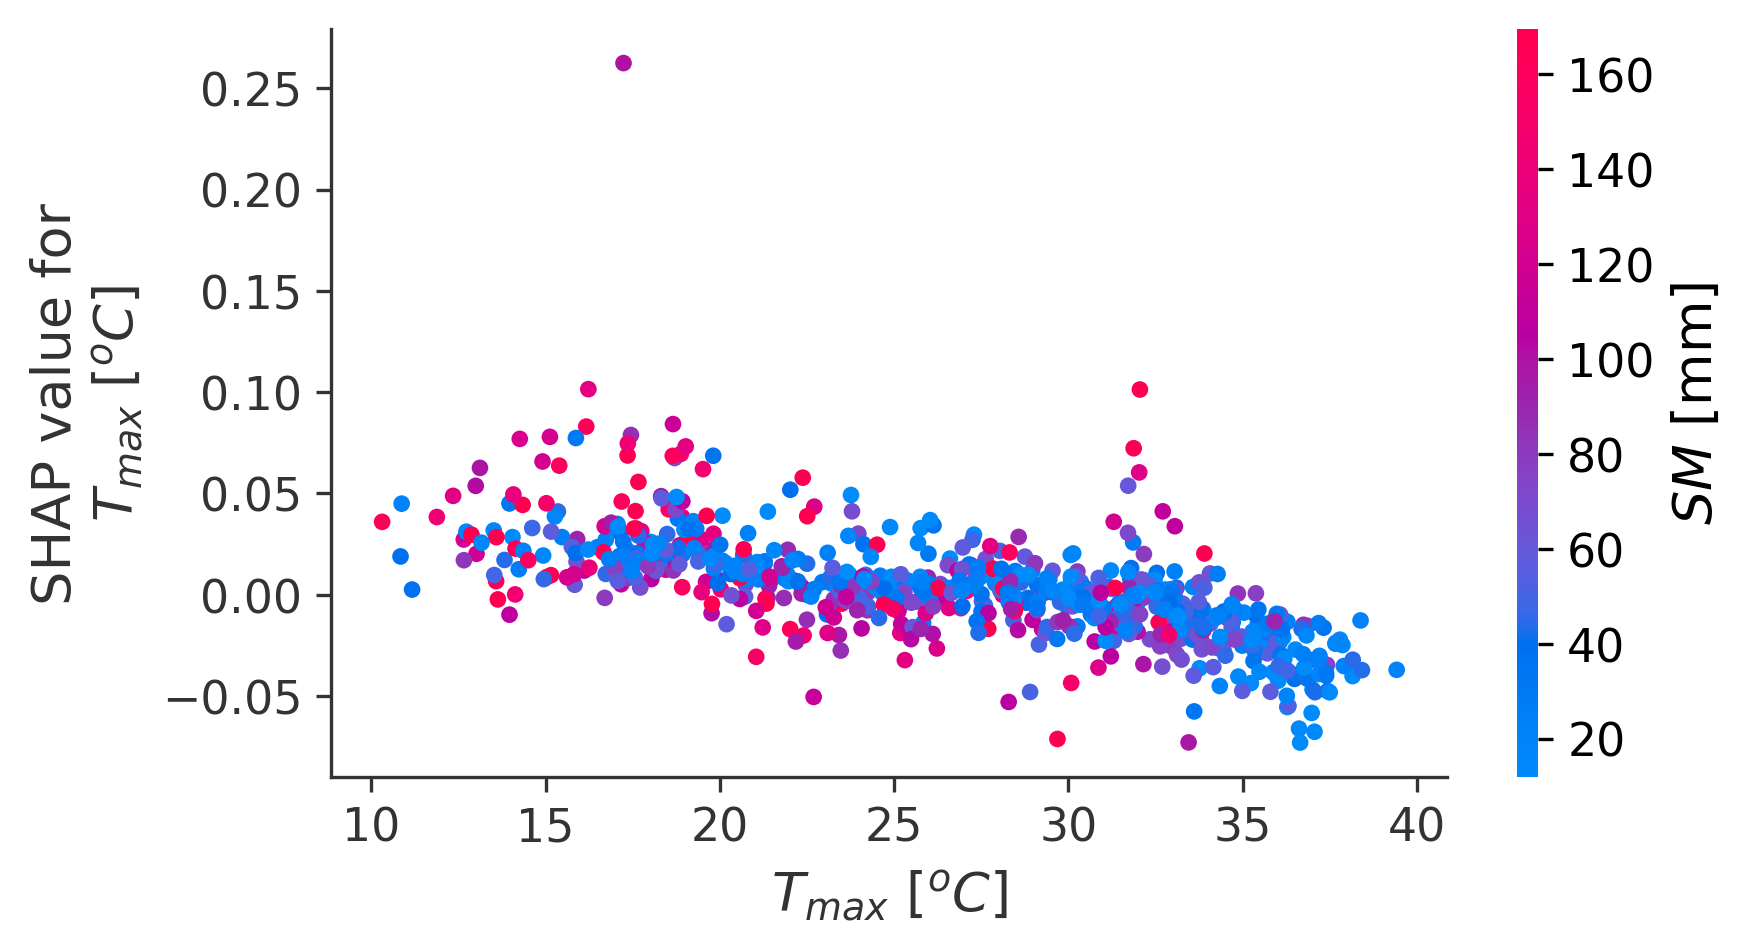

In [48]:

fig = plt.figure(figsize=(6,3.3),dpi=300)
ax1 = fig.add_subplot(1,1,1)

   
shap.dependence_plot('$T_{max}$ [$^oC$]', shap_values, df_AI2[Features].to_numpy(),Features, ax=ax1, show=False,
                     interaction_index='$SM$ [mm]')
plt.savefig(save_Model +str('/Feature Interaction_comal_springs - Tmax2 - Hist.jpg'), format='jpeg', dpi=300, bbox_inches ='tight')
